In [2]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr

from salishsea_tools import visualisations

import os
import pandas as pd
#from datetime import datetime



In [3]:
data = xr.open_dataset('/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20141101_20141130.nc')
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
bathymetry = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc', 'r')
meshgrid = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc', 'r')
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
thalweg = np.loadtxt('/home/sallen/MEOPAR/tools/bathymetry/thalweg_working.txt')

In [4]:
imin, imax = 300, 400
jmin, jmax = 240, 340
iibp, jjbp = 343, 289

Depth at BP point 226.75


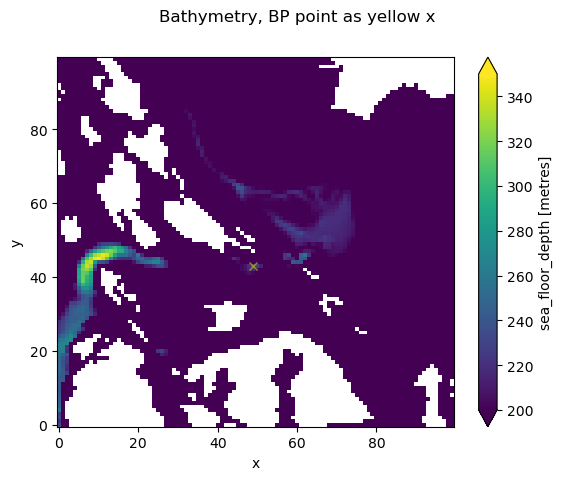

In [4]:

fig, ax = plt.subplots(1, 1)
bathy.Bathymetry[imin:imax, jmin:jmax].plot(ax=ax, vmin=200, vmax=350);
ax.plot(jjbp-jmin, iibp-imin, 'xy', alpha=0.7);
print (f'Depth at BP point {bathy.Bathymetry[iibp, jjbp].values}')
fig.suptitle('Bathymetry, BP point as yellow x');

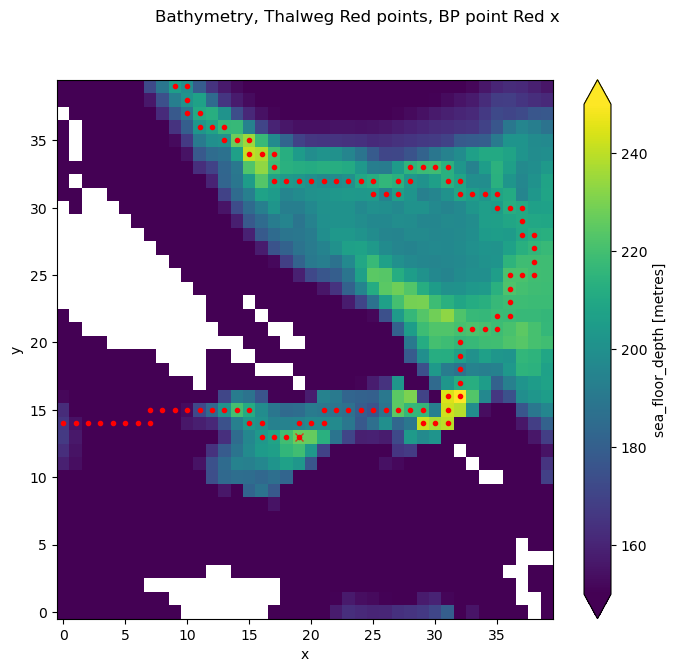

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
bathy.Bathymetry[imin+30:imax-30, jmin+30:jmax-30].plot(ax=ax, vmin=150, vmax=250);
ax.plot(jjbp-(jmin+30), iibp-(imin+30), 'rx', alpha=0.7);
ax.plot(thalweg[:, 1]-(jmin+30), thalweg[:, 0]-(imin+30), 'r.')
fig.suptitle('Bathymetry, Thalweg Red points, BP point Red x');

/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting

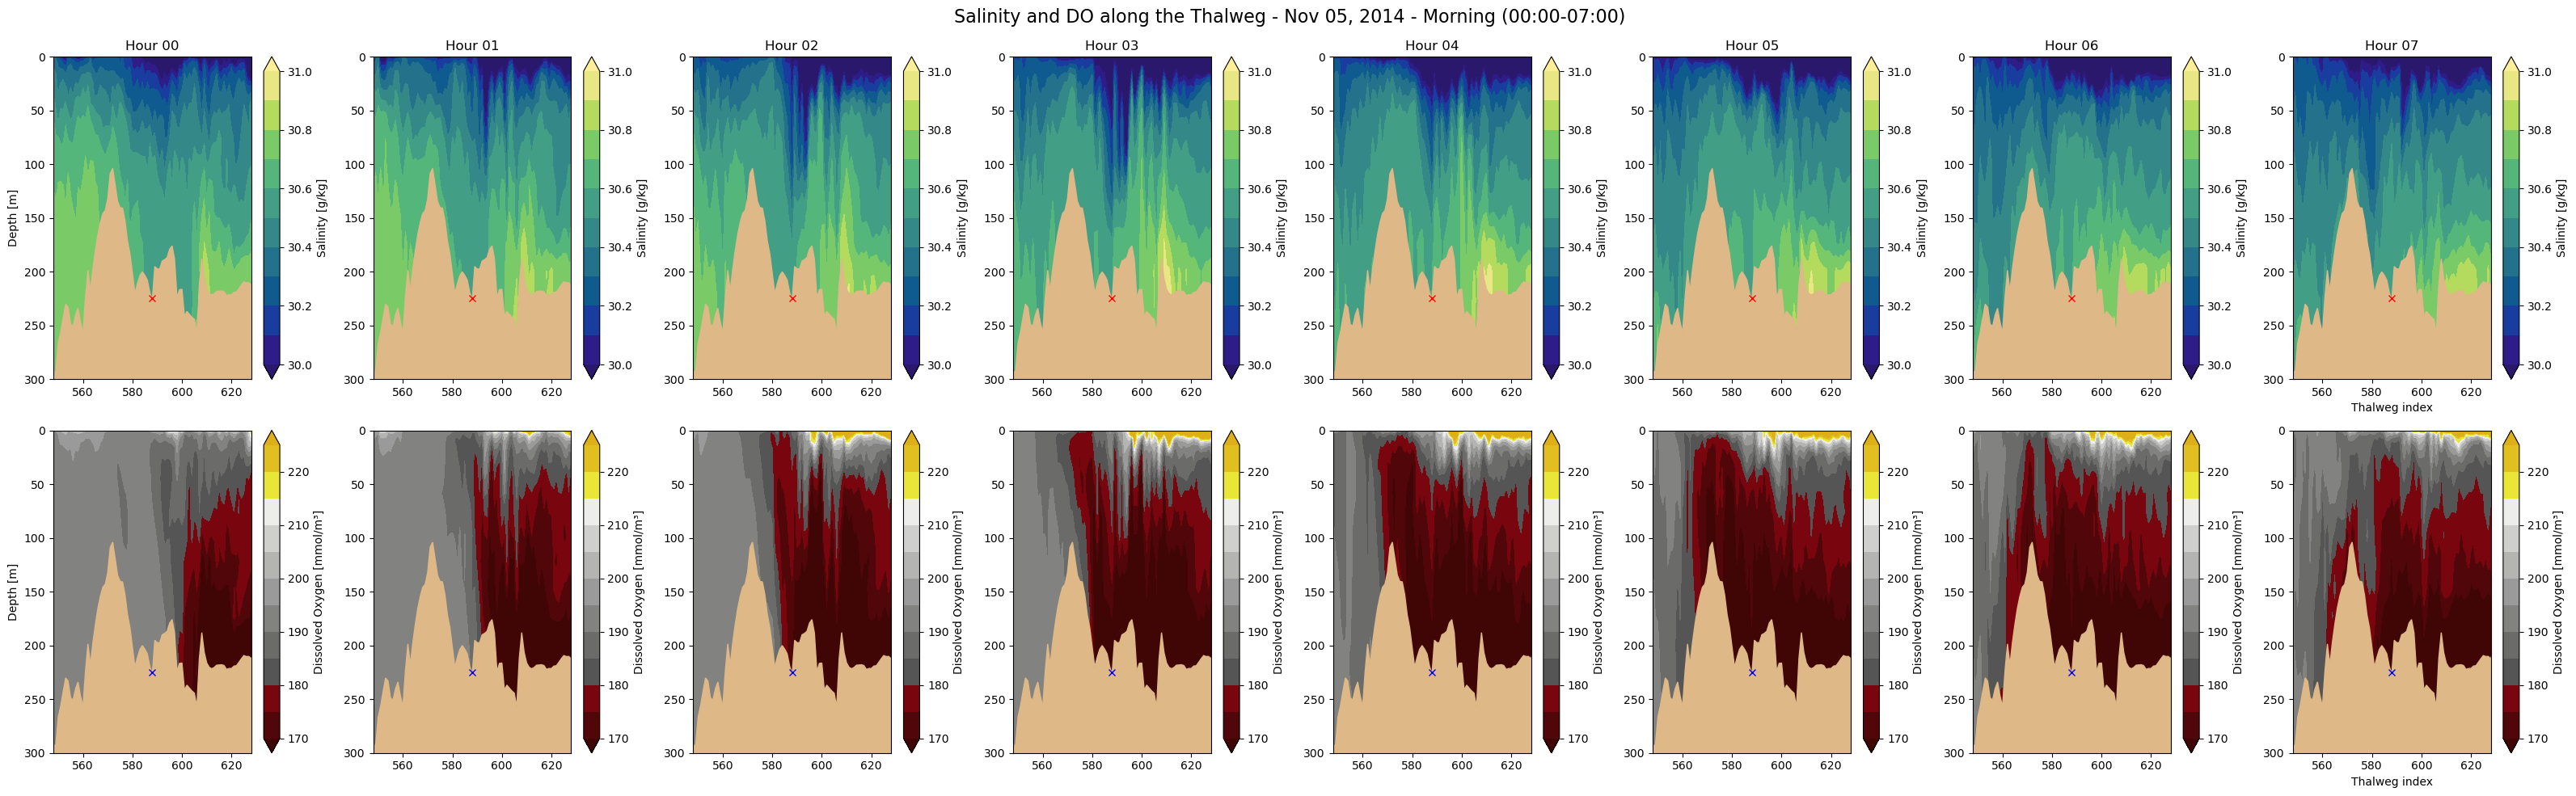

/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting

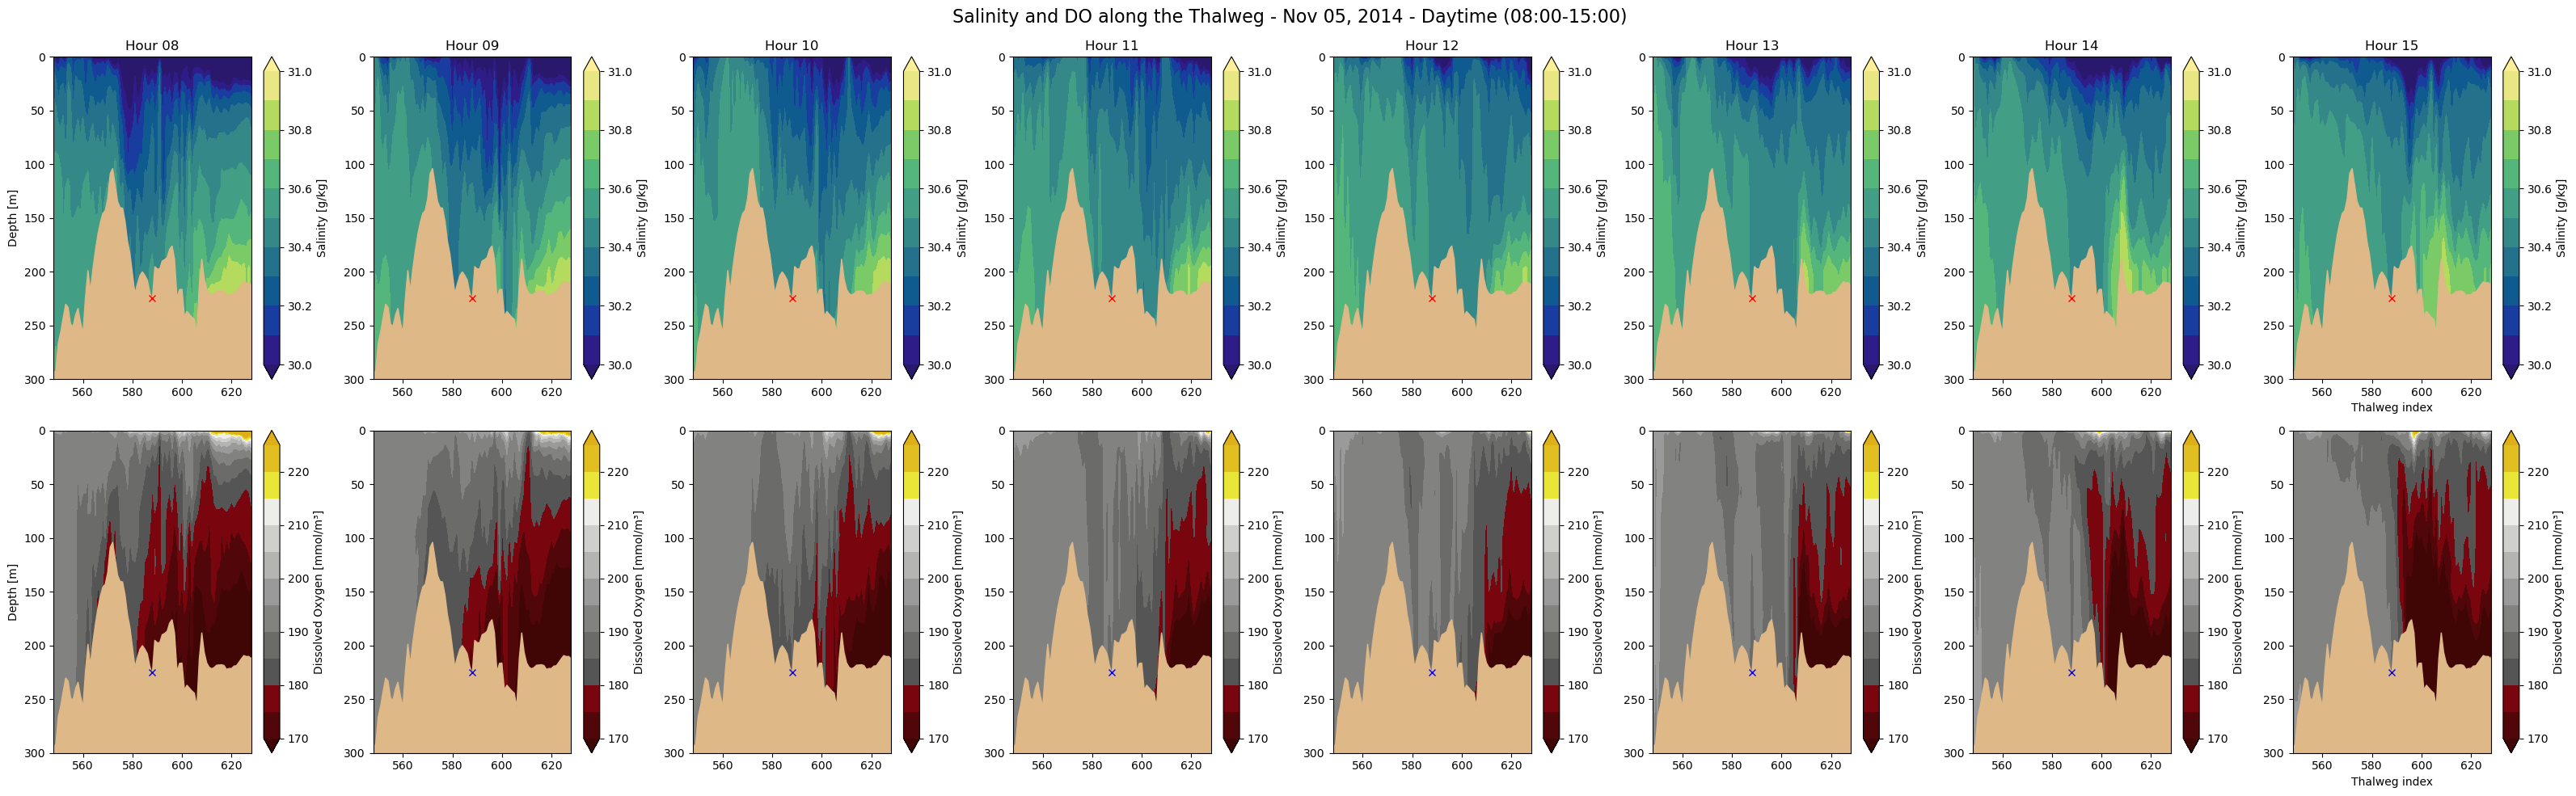

/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting

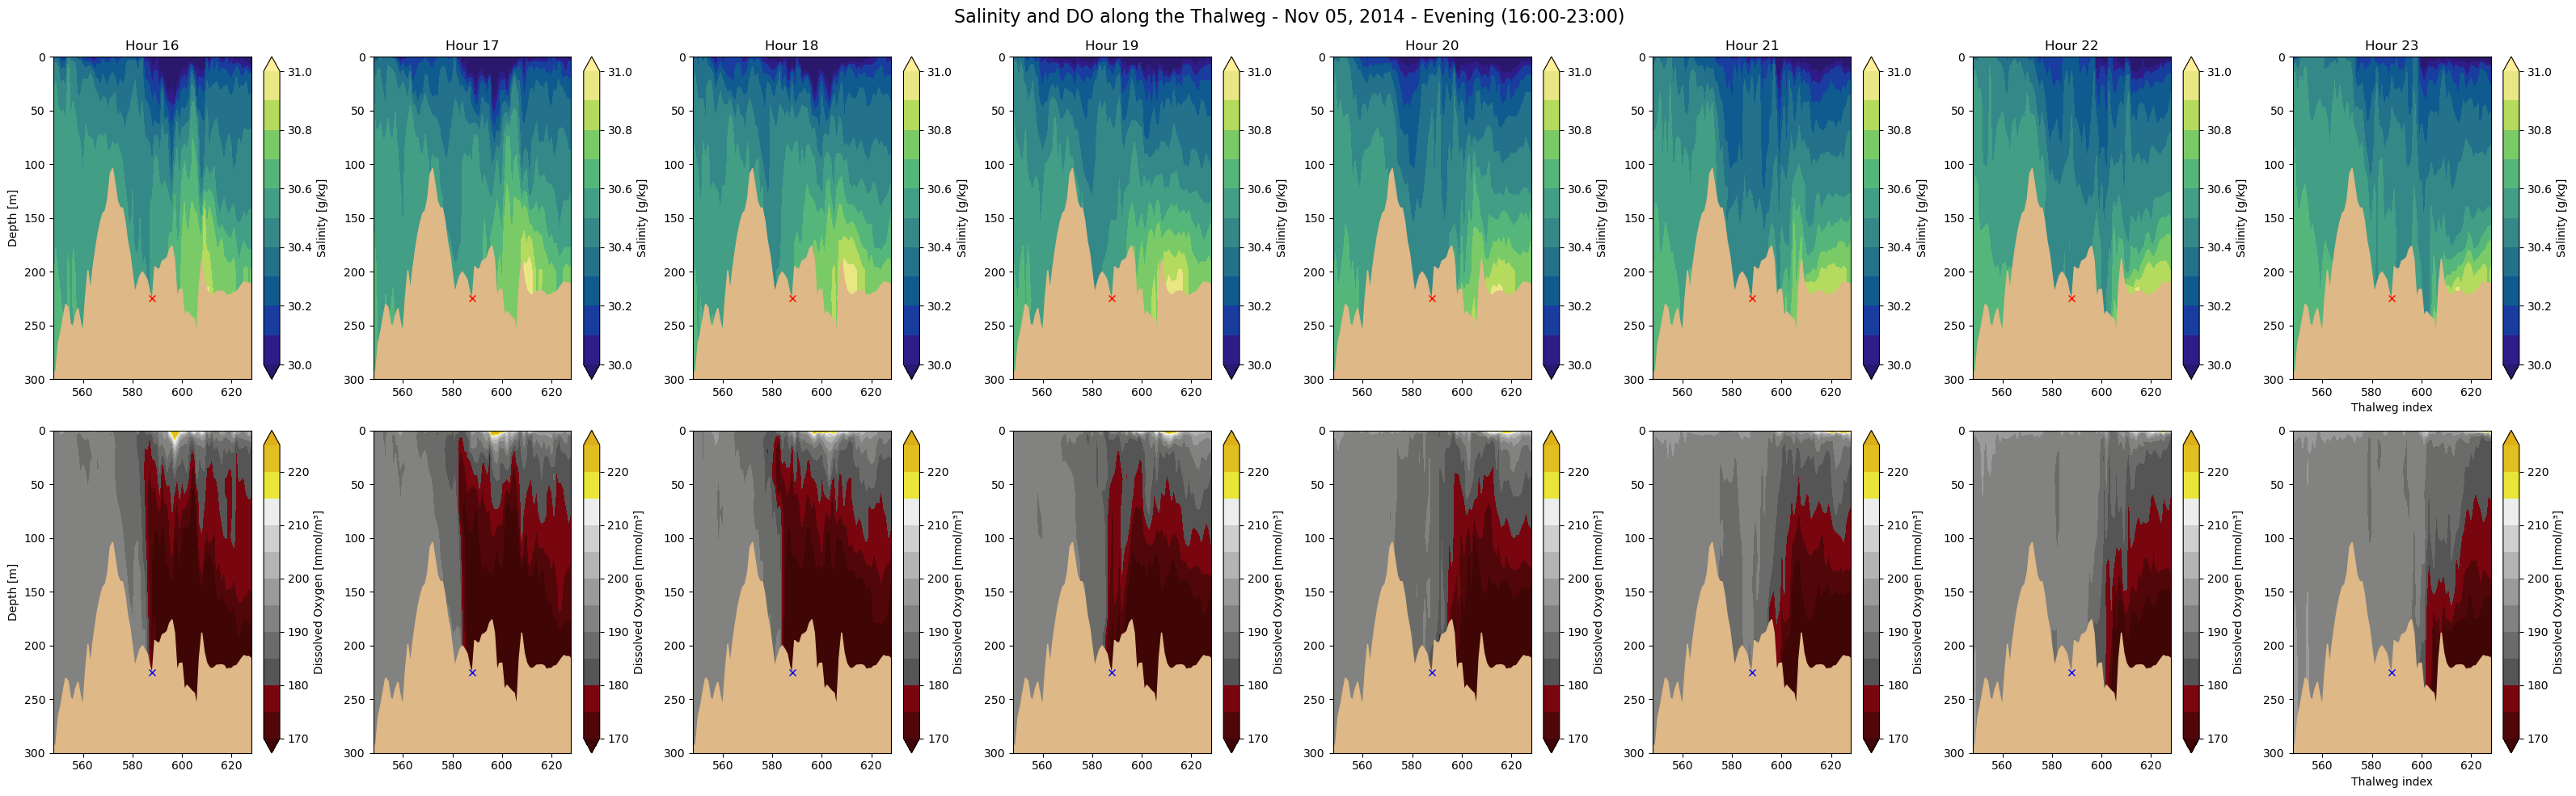

In [16]:
hour_groups = [
    [0, 1, 2, 3, 4, 5, 6, 7],
    [8, 9, 10, 11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20, 21, 22, 23]
]

group_names = ['Morning (00:00-07:00)', 'Daytime (08:00-15:00)', 'Evening (16:00-23:00)']

ymd = '20141105'
mdir = '05nov14'

sal_ds = xr.open_dataset(f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_grid_T.nc')
oxy_ds = xr.open_dataset(f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_chem_T.nc')

# figure for each group of hours
for group_idx, hours in enumerate(hour_groups):
    num_hours = len(hours)
    
    fig, axs = plt.subplots(2, num_hours, figsize=(4*num_hours, 10))
    
    # Plot for each hour
    for i, hr in enumerate(hours):
        salinity = sal_ds['vosaline'][hr, :]
        m = salinity == 0
        salinity = np.ma.array(salinity, mask=m)
        
        oxygen = oxy_ds['dissolved_oxygen'][hr, :]
        oxygen = np.ma.array(oxygen, mask=m)
        
        cbar_sal = visualisations.contour_thalweg(axs[0, i], salinity, bathymetry, meshgrid, 
                                           clevels=[30, 30.1, 30.2, 30.3, 30.4, 30.5, 
                                                    30.6, 30.7, 30.8, 30.9, 31], 
                                           cmap=cm.haline, xcoord_distance=False)
        cbar_sal.set_label('Salinity [g/kg]')
        
        cbar_oxy = visualisations.contour_thalweg(axs[1, i], oxygen, bathymetry, meshgrid, 
                                           clevels=[170, 175, 180, 185, 190, 195, 
                                                    200, 205, 210, 215, 220, 225], 
                                           cmap=cm.oxy, xcoord_distance=False)
        cbar_oxy.set_label('Dissolved Oxygen [mmol/m³]')
        
        for row in [0, 1]:
            axs[row, i].set_ylim(300, 0)
            axs[row, i].set_xlim(548, 628)  # 588 ± 40
            axs[row, i].plot(588, 225, 'xr' if row == 0 else 'xb')
        
        axs[0, i].set_title(f'Hour {hr:02d}')
        
        if i > 0:
            for row in [0, 1]:
                axs[row, i].set_ylabel('')
        if i < num_hours - 1:
            for row in [0, 1]:
                axs[row, i].set_xlabel('')
    
    axs[0, 0].set_ylabel('Depth [m]')
    axs[1, 0].set_ylabel('Depth [m]')
    
    fig.suptitle(f'Salinity and DO along the Thalweg - Nov 05, 2014 - {group_names[group_idx]}', 
                 fontsize=16)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    
    plt.show()


/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting

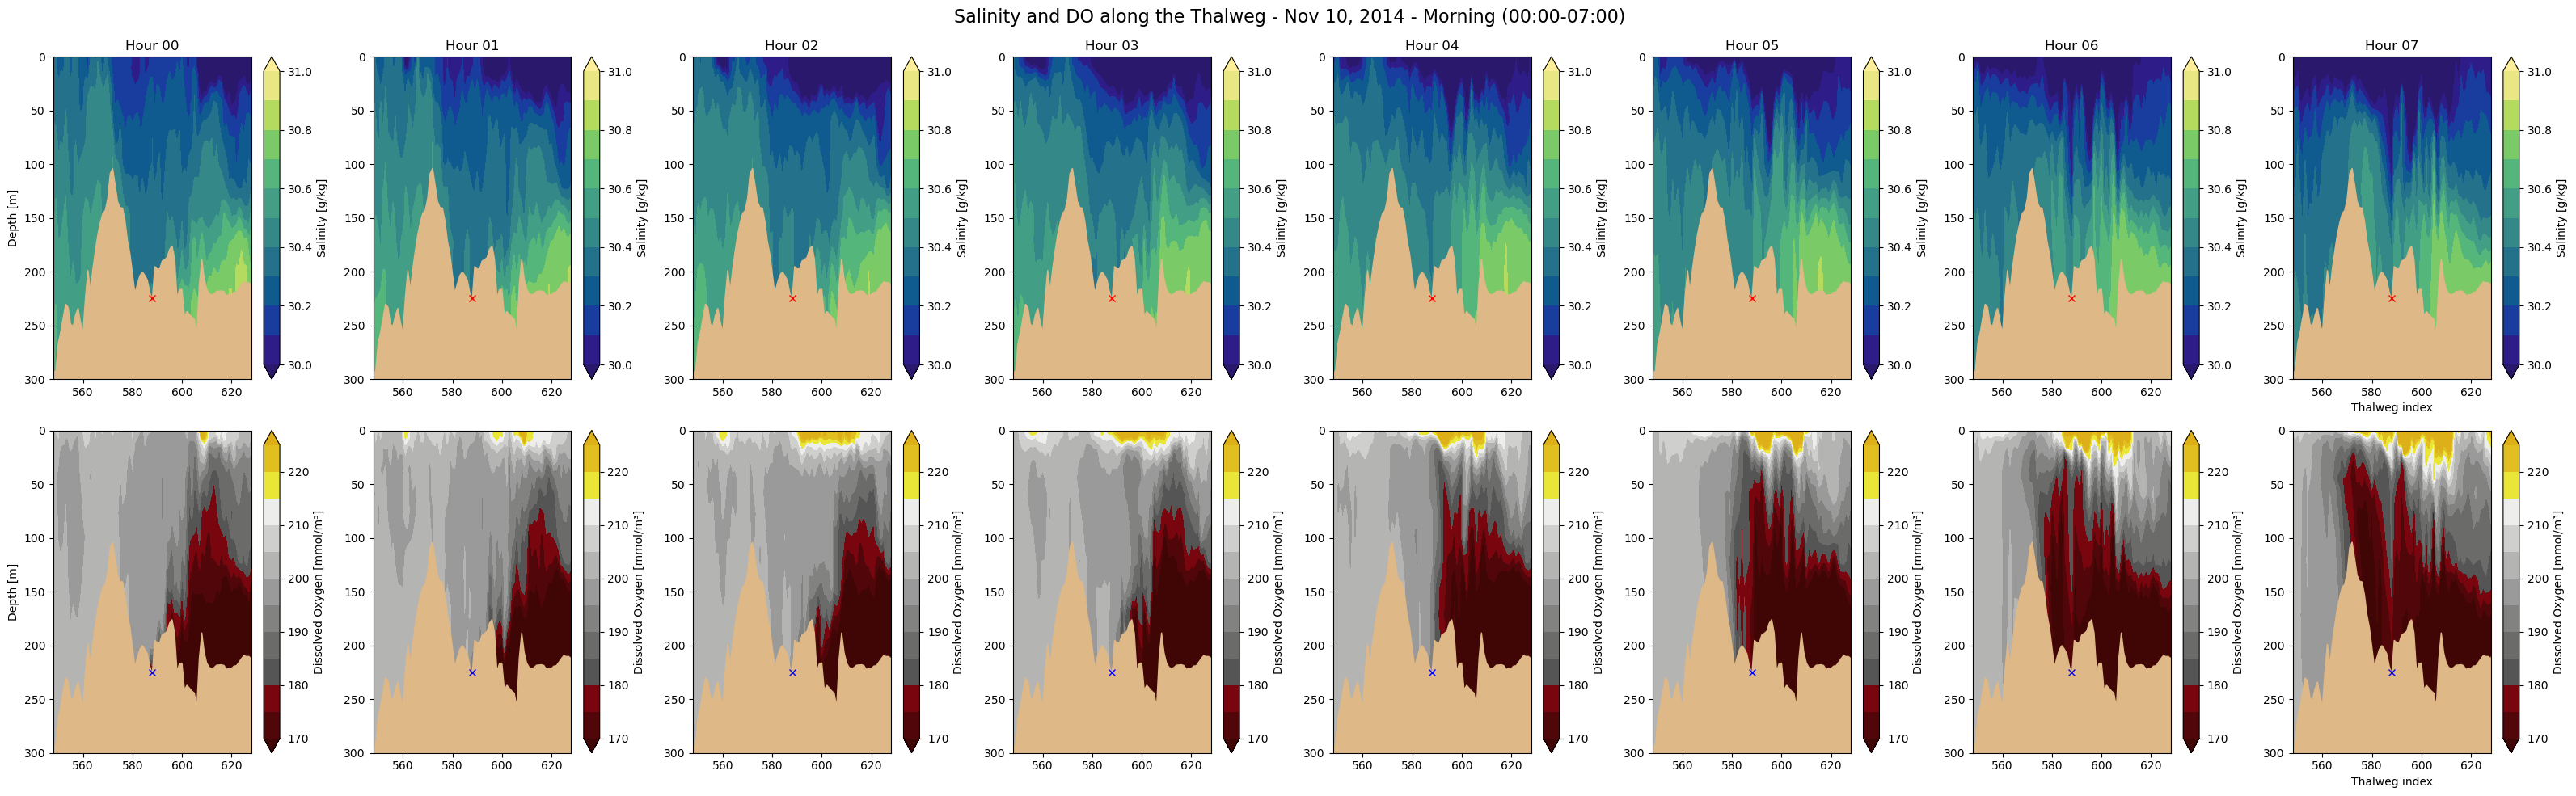

/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting

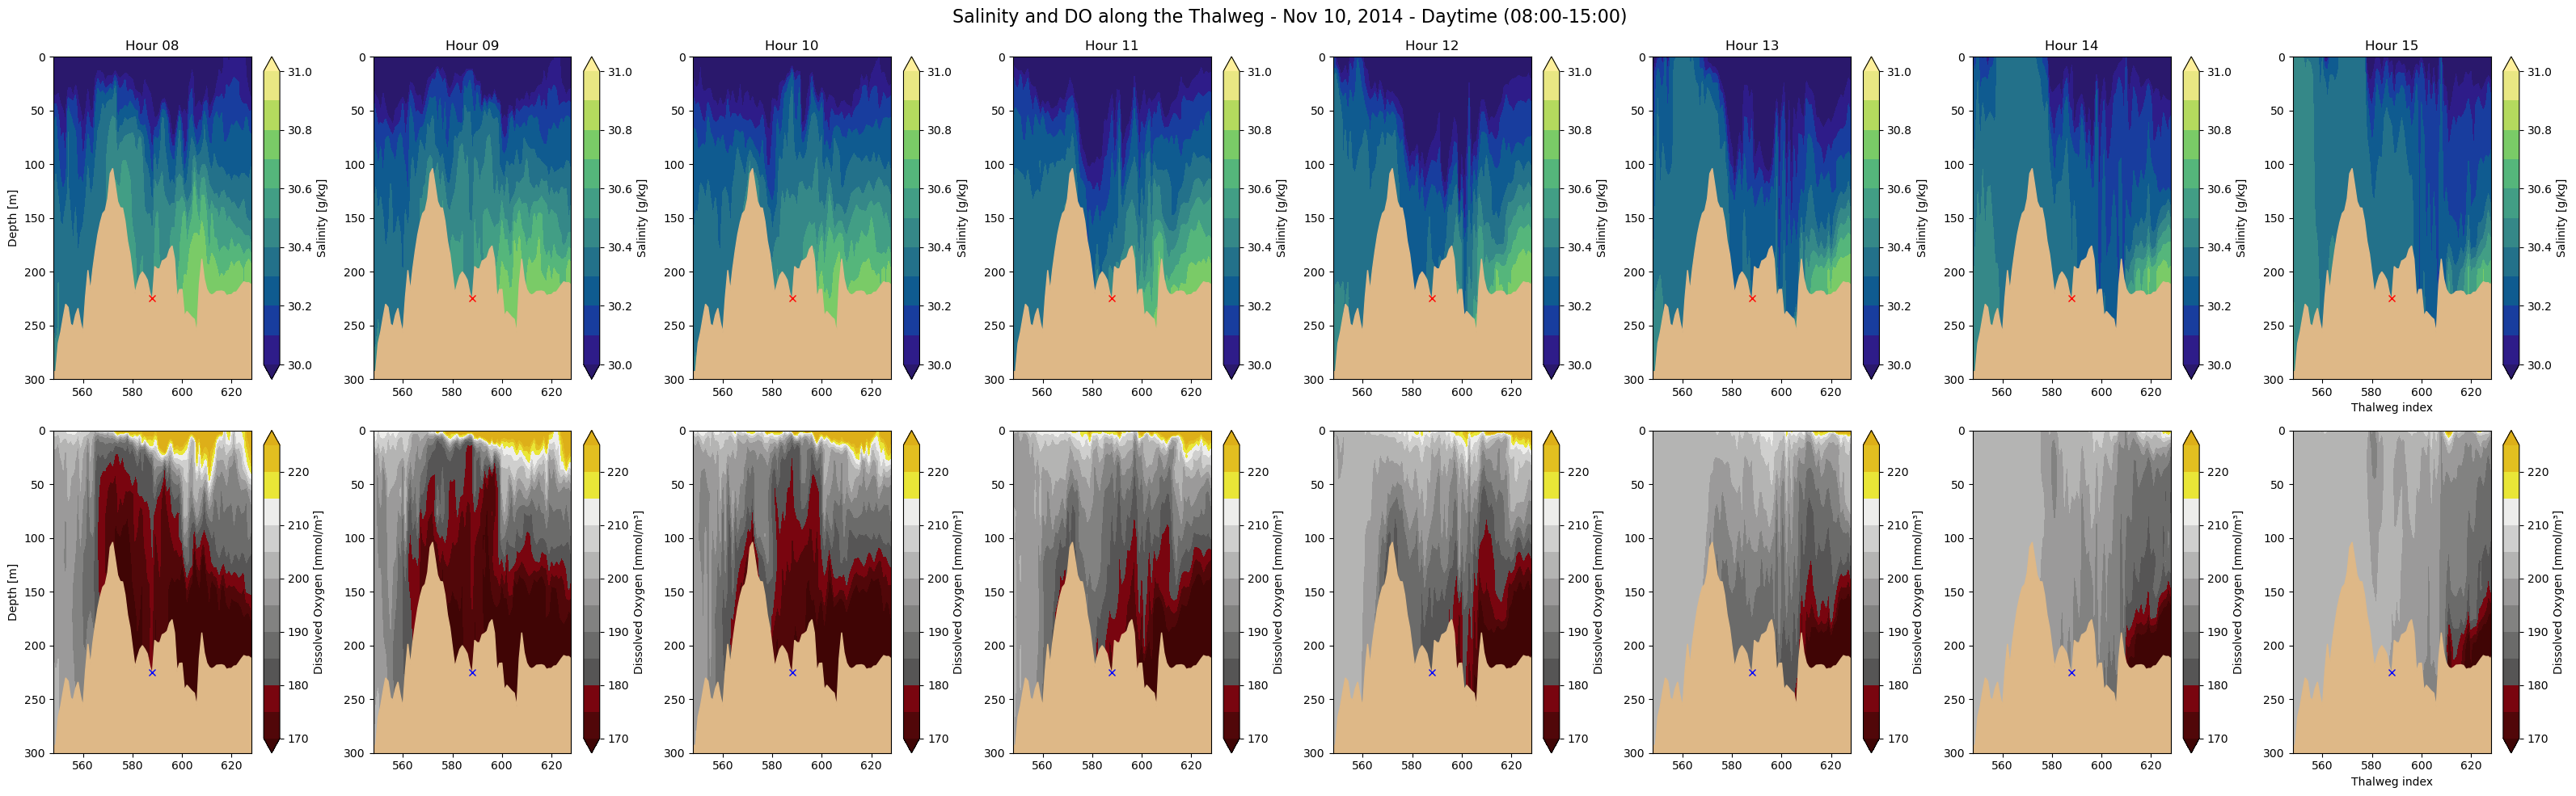

/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting

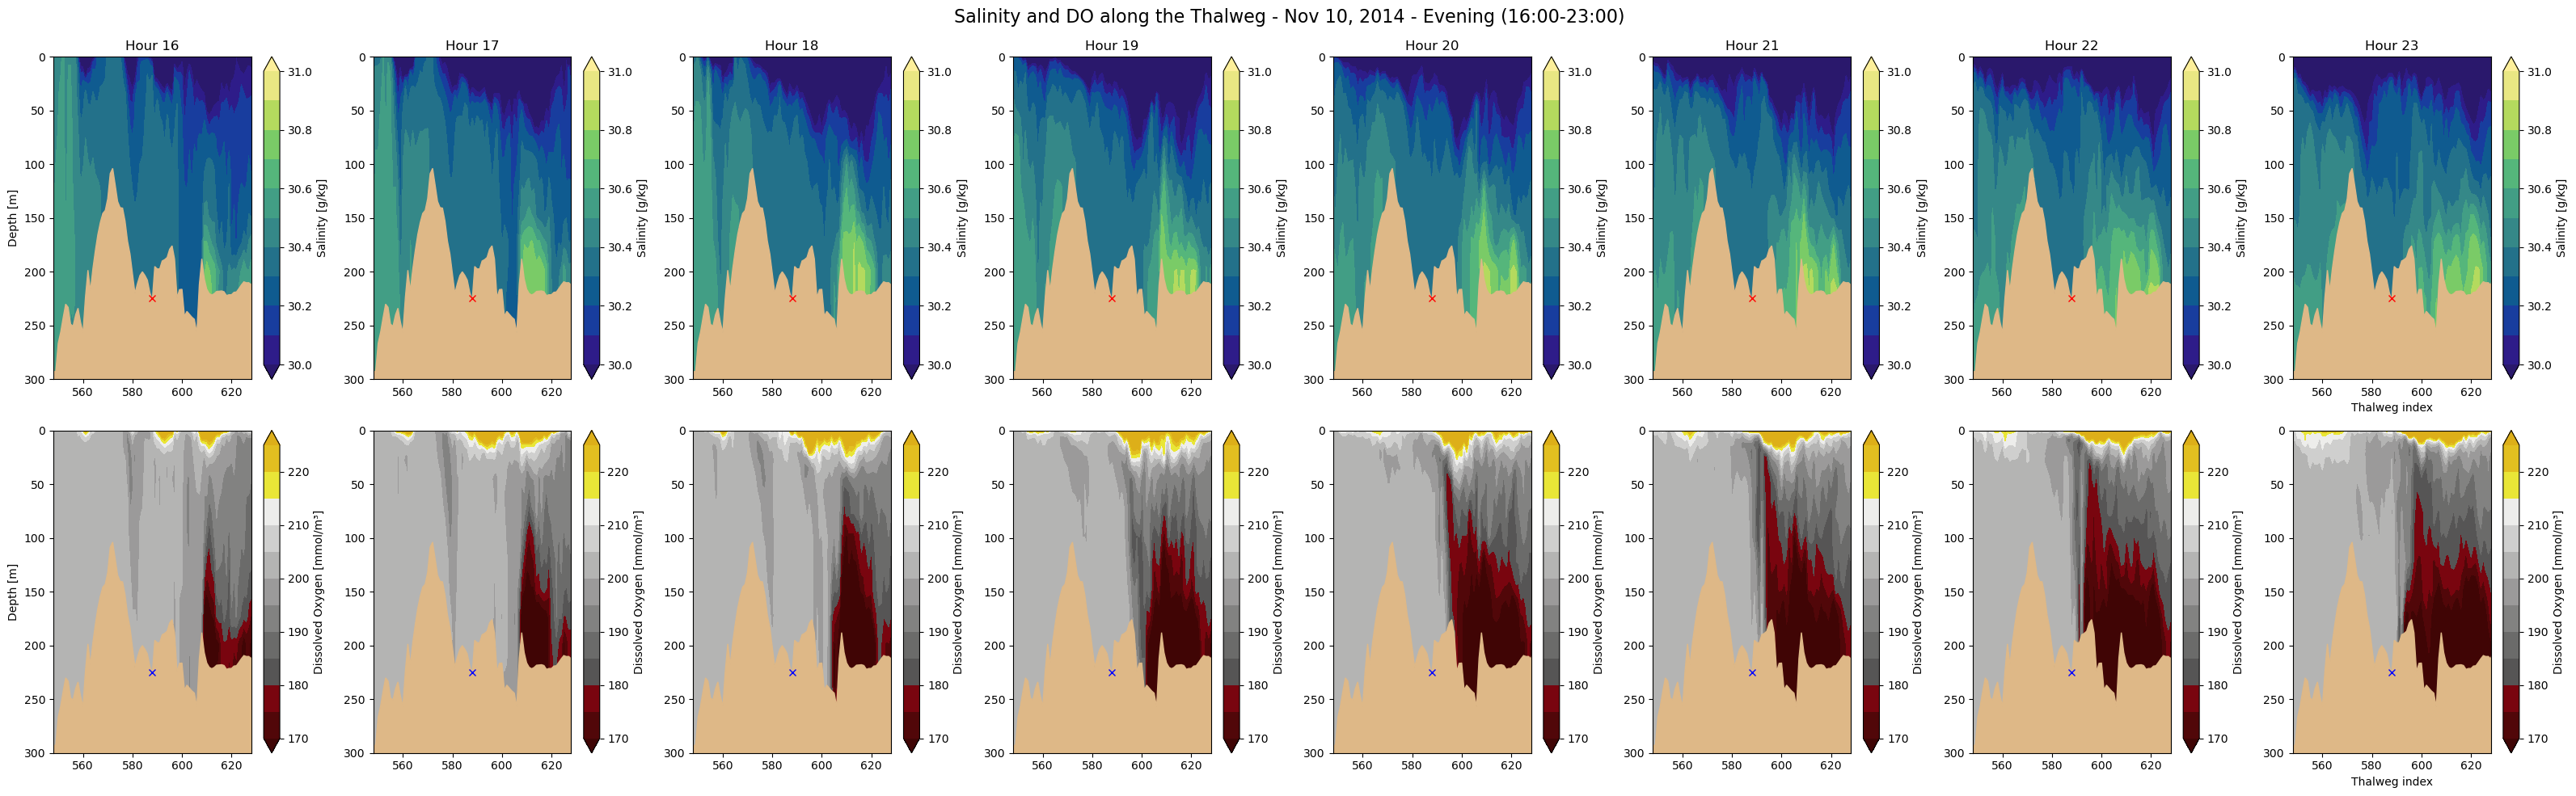

In [ ]:
ymd = '20141110'
mdir = '10nov14'

sal_ds = xr.open_dataset(f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_grid_T.nc')
oxy_ds = xr.open_dataset(f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_chem_T.nc')

# figure for each group of hours
for group_idx, hours in enumerate(hour_groups):
    num_hours = len(hours)
    
    fig, axs = plt.subplots(2, num_hours, figsize=(4*num_hours, 10))
    
    # Plot for each hour
    for i, hr in enumerate(hours):
        salinity = sal_ds['vosaline'][hr, :]
        m = salinity == 0
        salinity = np.ma.array(salinity, mask=m)
        
        oxygen = oxy_ds['dissolved_oxygen'][hr, :]
        oxygen = np.ma.array(oxygen, mask=m)
        
        cbar_sal = visualisations.contour_thalweg(axs[0, i], salinity, bathymetry, meshgrid, 
                                           clevels=[30, 30.1, 30.2, 30.3, 30.4, 30.5, 
                                                    30.6, 30.7, 30.8, 30.9, 31], 
                                           cmap=cm.haline, xcoord_distance=False)
        cbar_sal.set_label('Salinity [g/kg]')
        
        cbar_oxy = visualisations.contour_thalweg(axs[1, i], oxygen, bathymetry, meshgrid, 
                                           clevels=[170, 175, 180, 185, 190, 195, 
                                                    200, 205, 210, 215, 220, 225], 
                                           cmap=cm.oxy, xcoord_distance=False)
        cbar_oxy.set_label('Dissolved Oxygen [mmol/m³]')
        
        for row in [0, 1]:
            axs[row, i].set_ylim(300, 0)
            axs[row, i].set_xlim(548, 628)  # 588 ± 40
            axs[row, i].plot(588, 225, 'xr' if row == 0 else 'xb')
        
        axs[0, i].set_title(f'Hour {hr:02d}')
        
        if i > 0:
            for row in [0, 1]:
                axs[row, i].set_ylabel('')
        if i < num_hours - 1:
            for row in [0, 1]:
                axs[row, i].set_xlabel('')
    
    axs[0, 0].set_ylabel('Depth [m]')
    axs[1, 0].set_ylabel('Depth [m]')
    
    fig.suptitle(f'Salinity and DO along the Thalweg - Nov 10, 2014 - {group_names[group_idx]}', 
                 fontsize=16)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    
    plt.show()


/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]


/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting

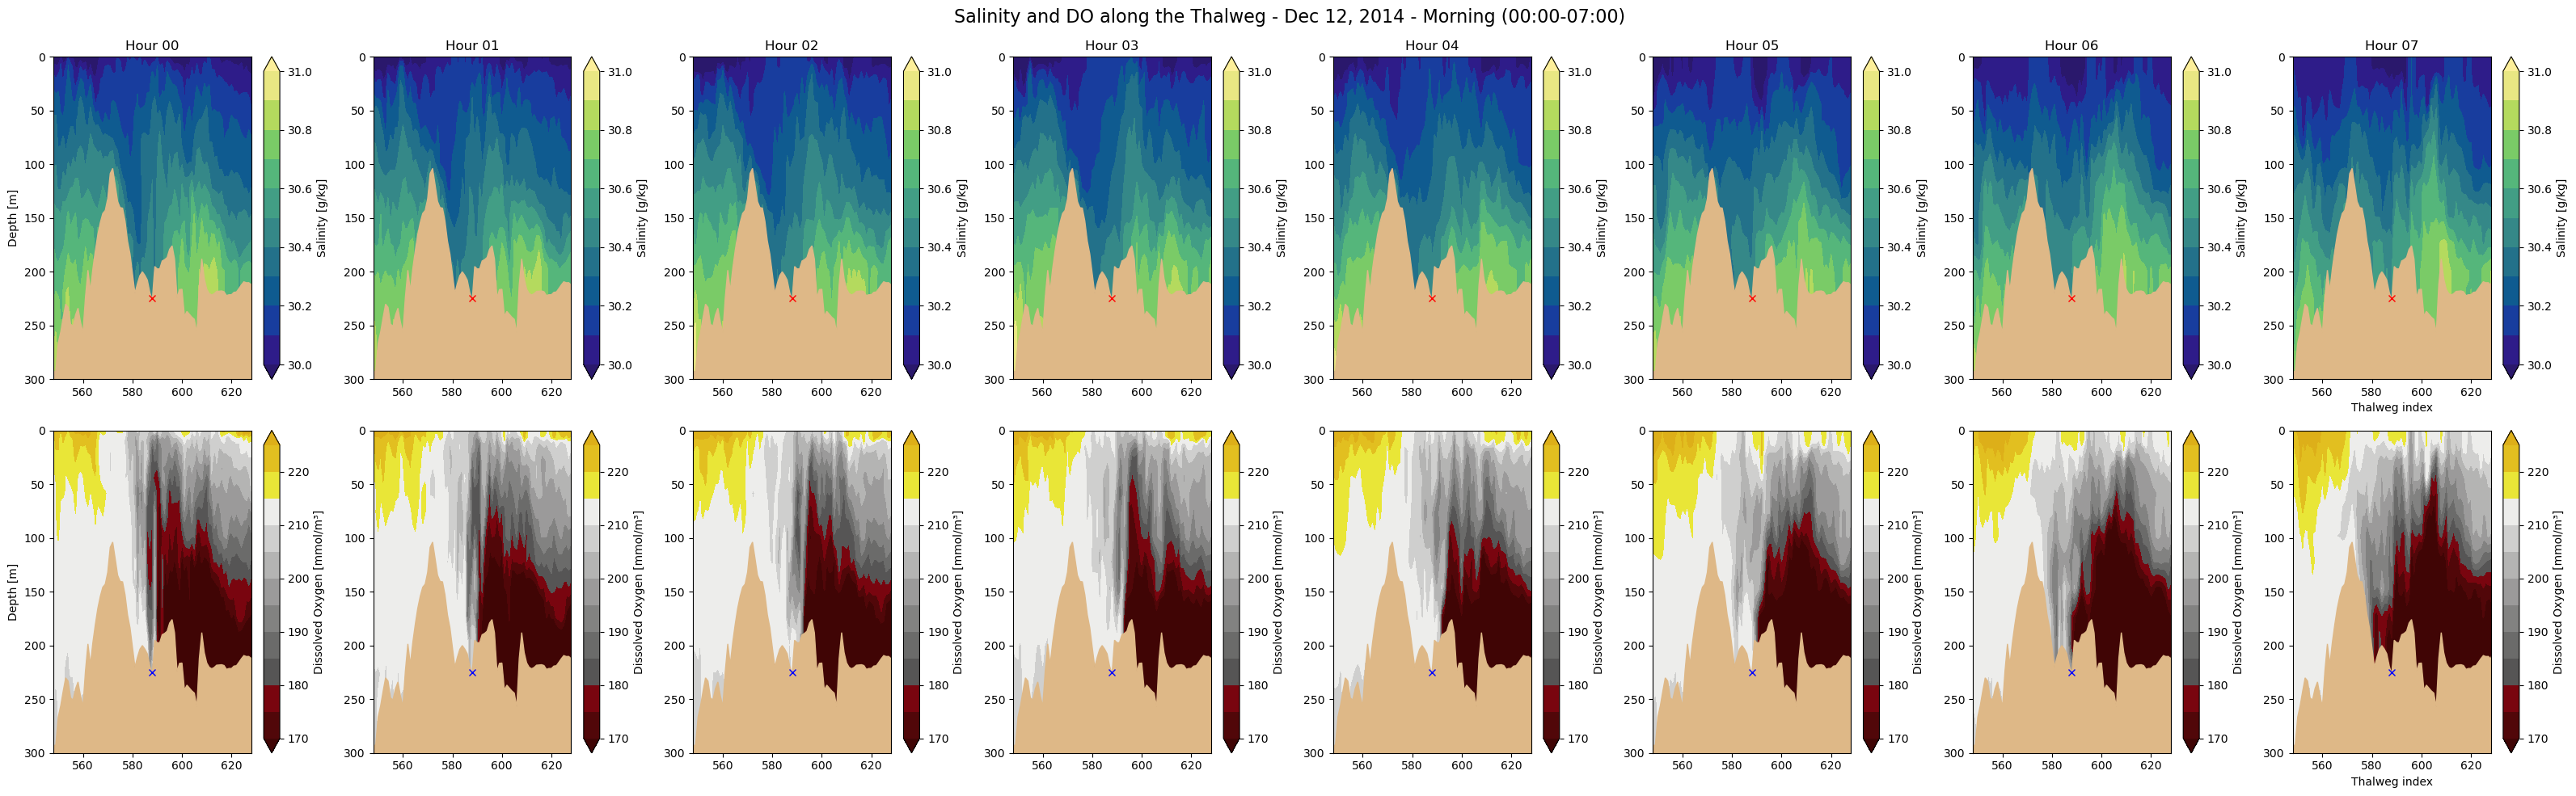

/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting

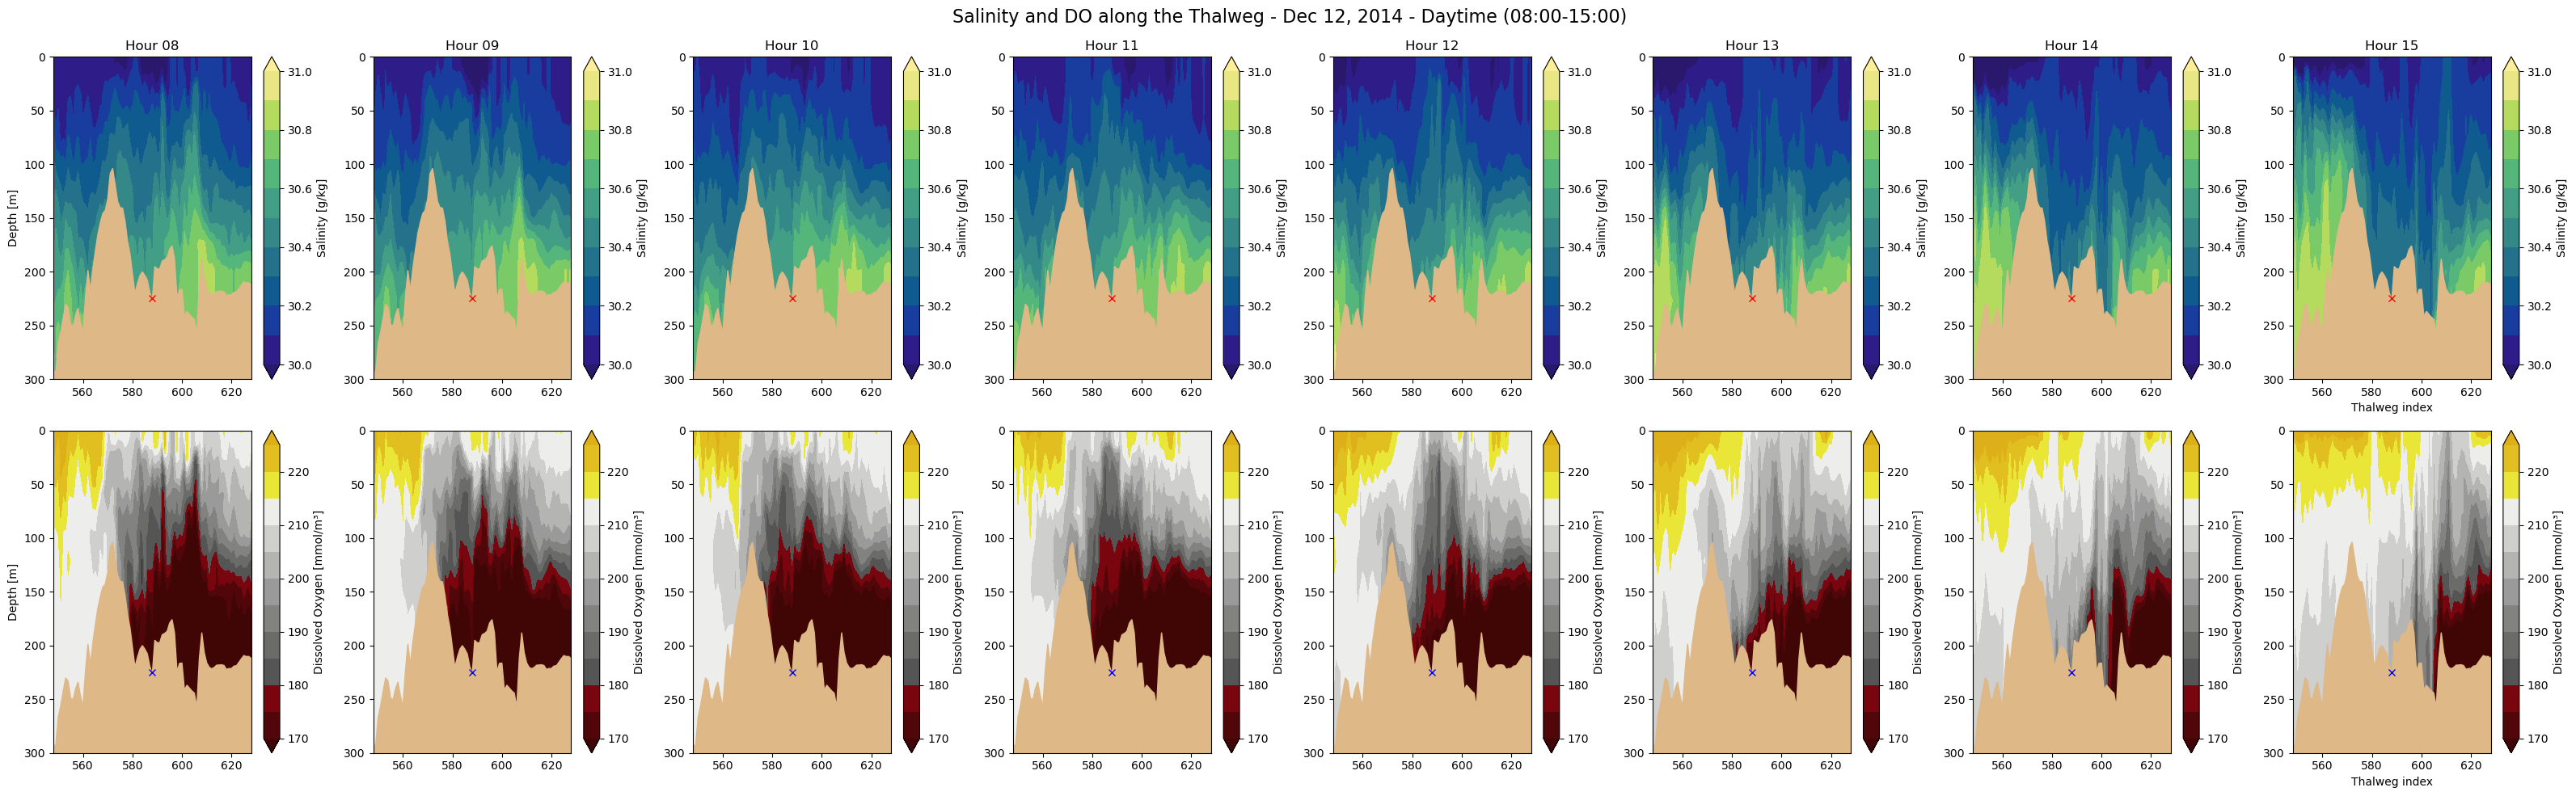

/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]
/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting

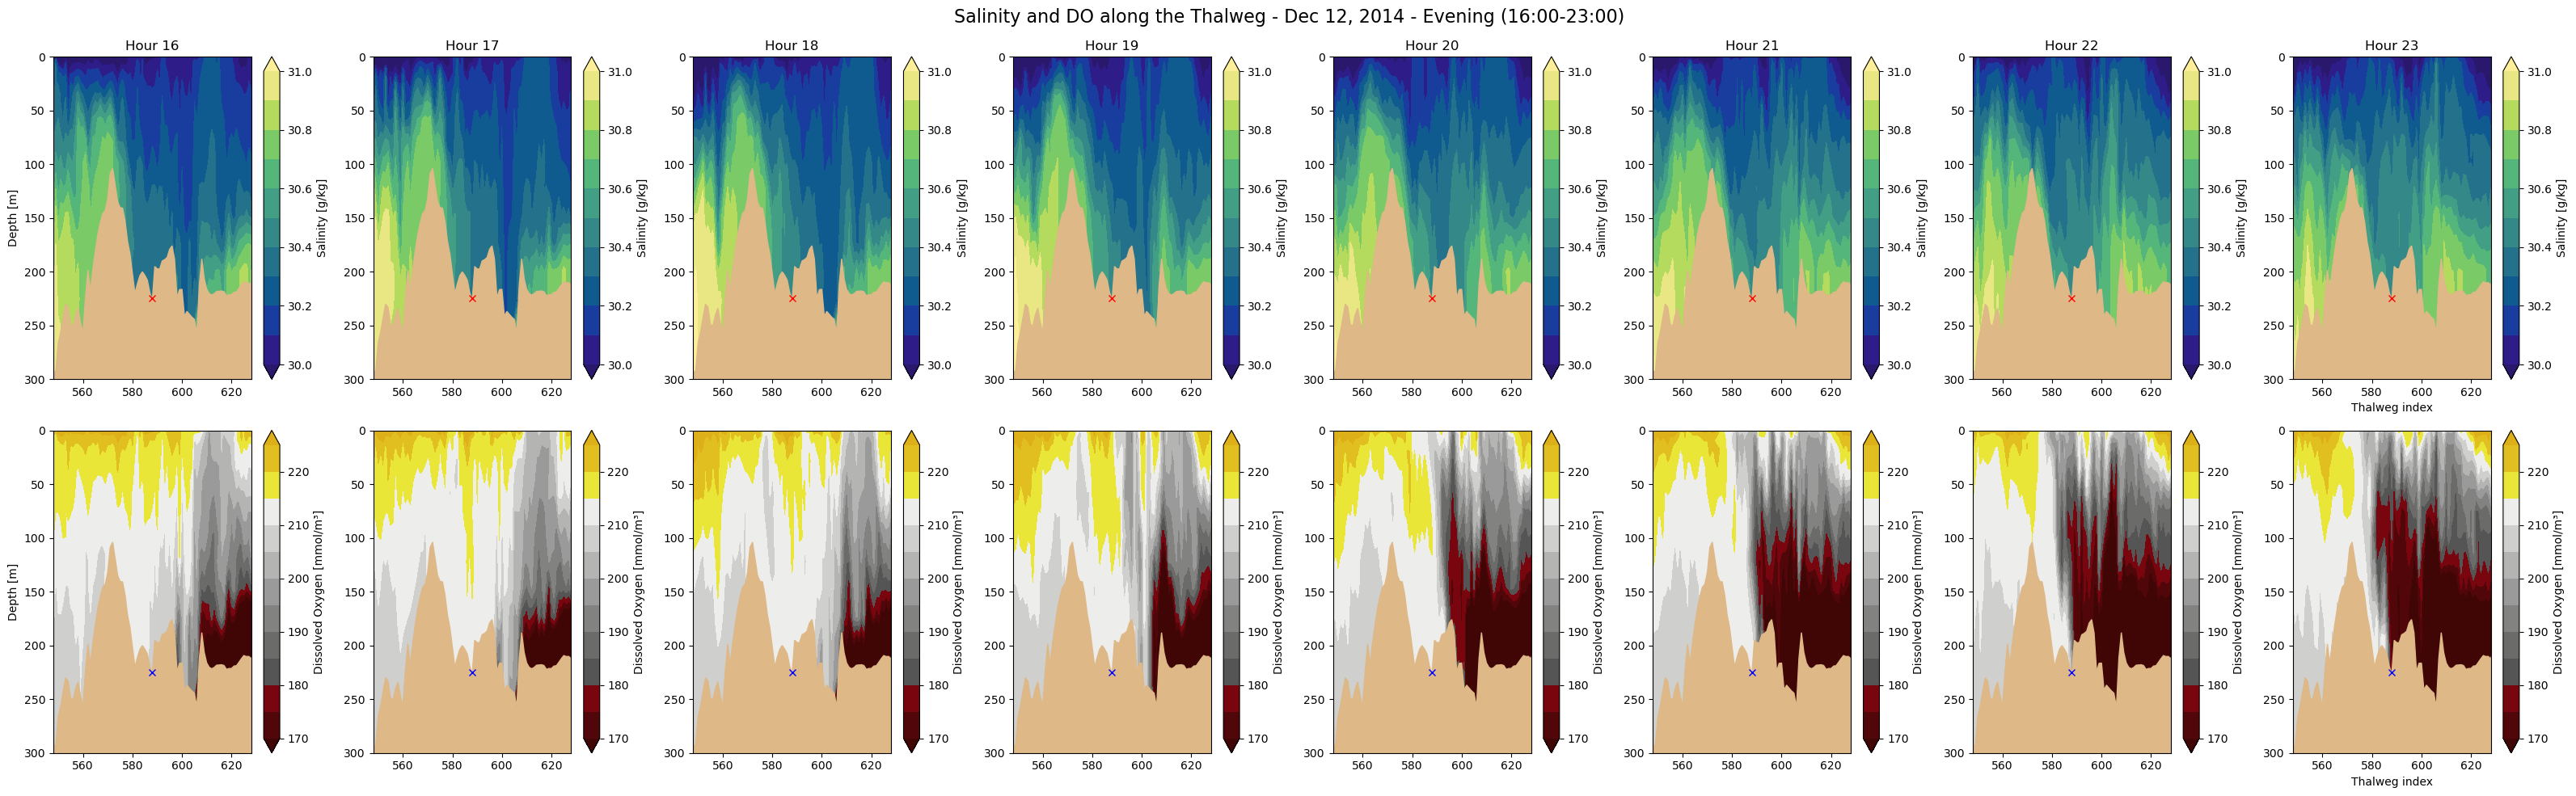

In [15]:
ymd = '20141212'
mdir = '12dec14'

sal_ds = xr.open_dataset(f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_grid_T.nc')
oxy_ds = xr.open_dataset(f'/results2/SalishSea/nowcast-green.202111/{mdir}/SalishSea_1h_{ymd}_{ymd}_chem_T.nc')

# figure for each group of hours
for group_idx, hours in enumerate(hour_groups):
    num_hours = len(hours)
    
    fig, axs = plt.subplots(2, num_hours, figsize=(4*num_hours, 10))
    
    # Plot for each hour
    for i, hr in enumerate(hours):
        salinity = sal_ds['vosaline'][hr, :]
        m = salinity == 0
        salinity = np.ma.array(salinity, mask=m)
        
        oxygen = oxy_ds['dissolved_oxygen'][hr, :]
        oxygen = np.ma.array(oxygen, mask=m)
        
        cbar_sal = visualisations.contour_thalweg(axs[0, i], salinity, bathymetry, meshgrid, 
                                           clevels=[30, 30.1, 30.2, 30.3, 30.4, 30.5, 
                                                    30.6, 30.7, 30.8, 30.9, 31], 
                                           cmap=cm.haline, xcoord_distance=False)
        cbar_sal.set_label('Salinity [g/kg]')
        
        cbar_oxy = visualisations.contour_thalweg(axs[1, i], oxygen, bathymetry, meshgrid, 
                                           clevels=[170, 175, 180, 185, 190, 195, 
                                                    200, 205, 210, 215, 220, 225], 
                                           cmap=cm.oxy, xcoord_distance=False)
        cbar_oxy.set_label('Dissolved Oxygen [mmol/m³]')
        
        for row in [0, 1]:
            axs[row, i].set_ylim(300, 0)
            axs[row, i].set_xlim(548, 628)  # 588 ± 40
            axs[row, i].plot(588, 225, 'xr' if row == 0 else 'xb')
        
        axs[0, i].set_title(f'Hour {hr:02d}')
        
        if i > 0:
            for row in [0, 1]:
                axs[row, i].set_ylabel('')
        if i < num_hours - 1:
            for row in [0, 1]:
                axs[row, i].set_xlabel('')
    
    axs[0, 0].set_ylabel('Depth [m]')
    axs[1, 0].set_ylabel('Depth [m]')
    
    fig.suptitle(f'Salinity and DO along the Thalweg - Dec 12, 2014 - {group_names[group_idx]}', 
                 fontsize=16)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    
    plt.show()


Processing Nov05...


/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]


Processing Nov10...


/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]


Processing Dec12...


/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]


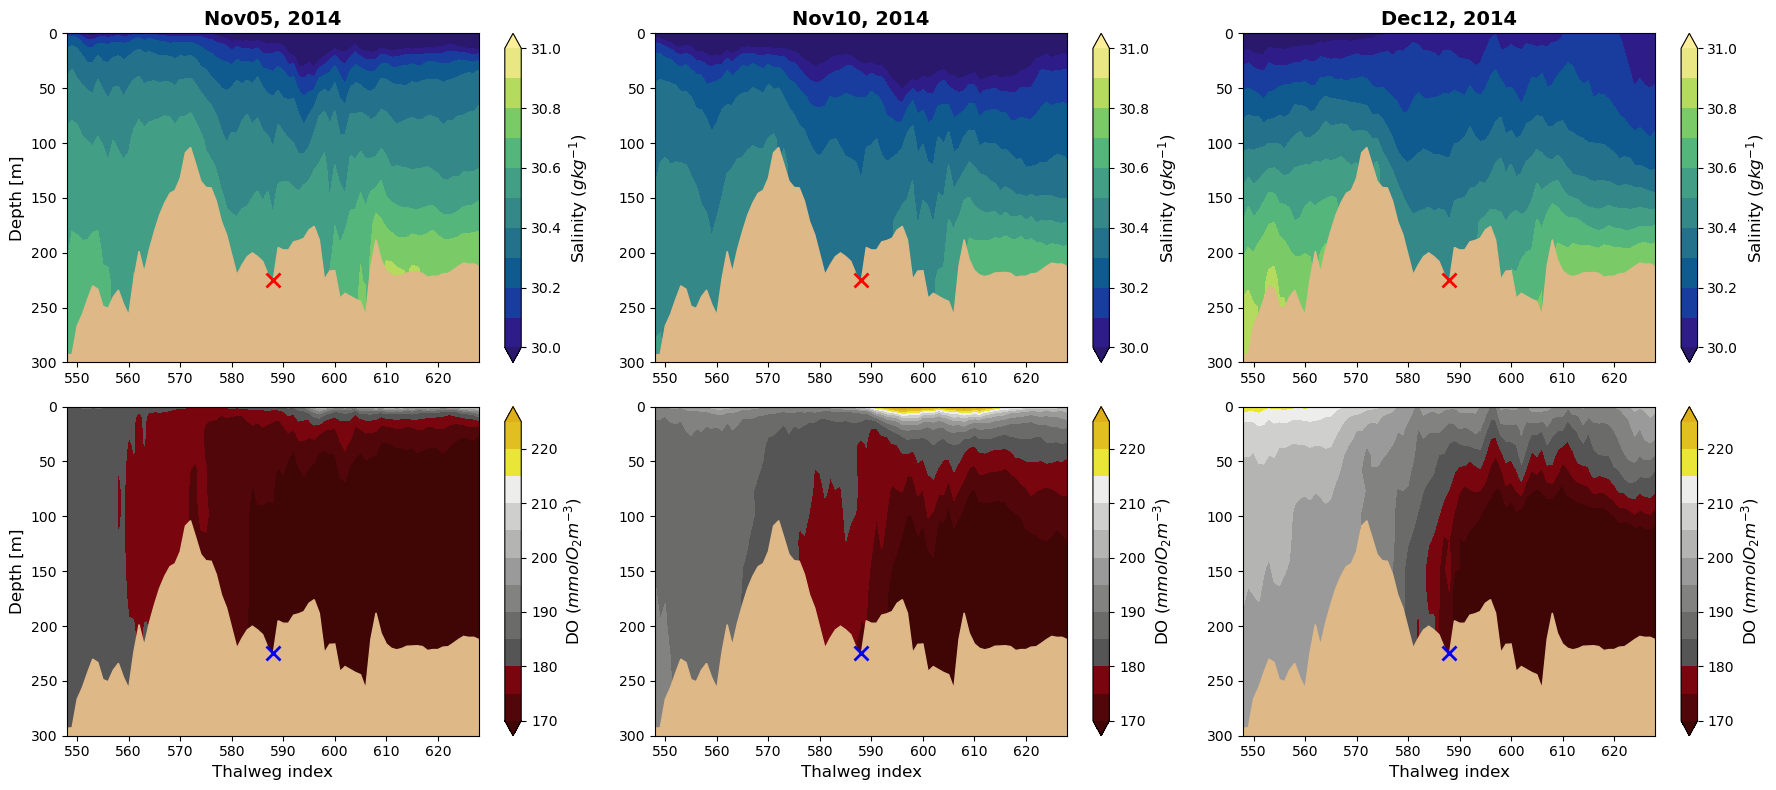

In [19]:
# Define the days
days = [
    {'mdir': '05nov14', 'ymd': '20141105', 'label': 'Nov05'},
    {'mdir': '10nov14', 'ymd': '20141110', 'label': 'Nov10'}, 
    {'mdir': '12dec14', 'ymd': '20141212', 'label': 'Dec12'}
]

daily_base_dir = '/ocean/atall/MOAD/Model/202410b/oxygen/'

fig, axs = plt.subplots(2, 3, figsize=(18, 8))

for col, day_info in enumerate(days):
    mdir = day_info['mdir']
    ymd = day_info['ymd']
    label = day_info['label']
    
    print(f"Processing {label}...")
    
    daily_dir = os.path.join(daily_base_dir, mdir)
    grid_file = f"SalishSea_1d_{ymd}_{ymd}_grid_T.nc"
    chem_file = f"SalishSea_1d_{ymd}_{ymd}_chem_T.nc"
    
    grid_path = os.path.join(daily_dir, grid_file)
    chem_path = os.path.join(daily_dir, chem_file)
    
    
    grid_ds = xr.open_dataset(grid_path)
    chem_ds = xr.open_dataset(chem_path)
    
    salinity = grid_ds['vosaline'].squeeze()  
    oxygen = chem_ds['dissolved_oxygen'].squeeze()
        
    # Mask zero values
    m = salinity == 0
    salinity = np.ma.array(salinity, mask=m)
    oxygen = np.ma.array(oxygen, mask=m)
        
    # Plot salinity in row 0
    cbar_sal = visualisations.contour_thalweg(axs[0, col], salinity, bathymetry, meshgrid, 
                                        clevels=[30, 30.1, 30.2, 30.3, 30.4, 30.5, 
                                                30.6, 30.7, 30.8, 30.9, 31], 
                                        cmap=cm.haline, xcoord_distance=False)
    cbar_sal.set_label('Salinity ($g kg^{-1}$)', fontsize=12)
        
    # Plot oxygen in row 1
    cbar_oxy = visualisations.contour_thalweg(axs[1, col], oxygen, bathymetry, meshgrid, 
                                        clevels=[170, 175, 180, 185, 190, 195, 
                                                200, 205, 210, 215, 220, 225], 
                                        cmap=cm.oxy, xcoord_distance=False)
    cbar_oxy.set_label('DO ($mmolO_2m^{-3}$)', fontsize=12)
        
    # Set limits and markers
    for row in [0, 1]:
        axs[row, col].set_ylim(300, 0)
        axs[row, col].set_xlim(548, 628)
        #axs[row, col].set_xlim(400, 780)
        # Mark BP location
        axs[row, col].plot(588, 225, 'xr' if row == 0 else 'xb', markersize=10, markeredgewidth=2)
        if row == 0:
            axs[row, col].set_xlabel('')
        else:
            axs[row, col].set_xlabel('Thalweg index', fontsize=12)
        
    axs[0, col].set_title(f'{label}, 2014', fontsize=14, fontweight='bold')
    
    # Set row labels on first column only
    if col == 0:
        axs[0, col].set_ylabel('Depth [m]', fontsize=12)
        axs[1, col].set_ylabel('Depth [m]', fontsize=12)
    else:
        axs[0, col].set_ylabel('')
        axs[1, col].set_ylabel('')



plt.tight_layout()

outdir = 'diagnostics_output'
os.makedirs(outdir, exist_ok=True)
plt.savefig(f'{outdir}/thalweg_daily_comparison_nov05_nov10_dec12.png', bbox_inches='tight', dpi=150)
plt.show()


Processing Nov05...


/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]


Processing Nov10...


/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]


Processing Dec12...


/ocean/atall/MOAD/tools/SalishSeaTools/salishsea_tools/visualisations.py:230: UserWarning: Warning: converting a masked element to nan.
  newvar[level, i] = variable[level-1, i]


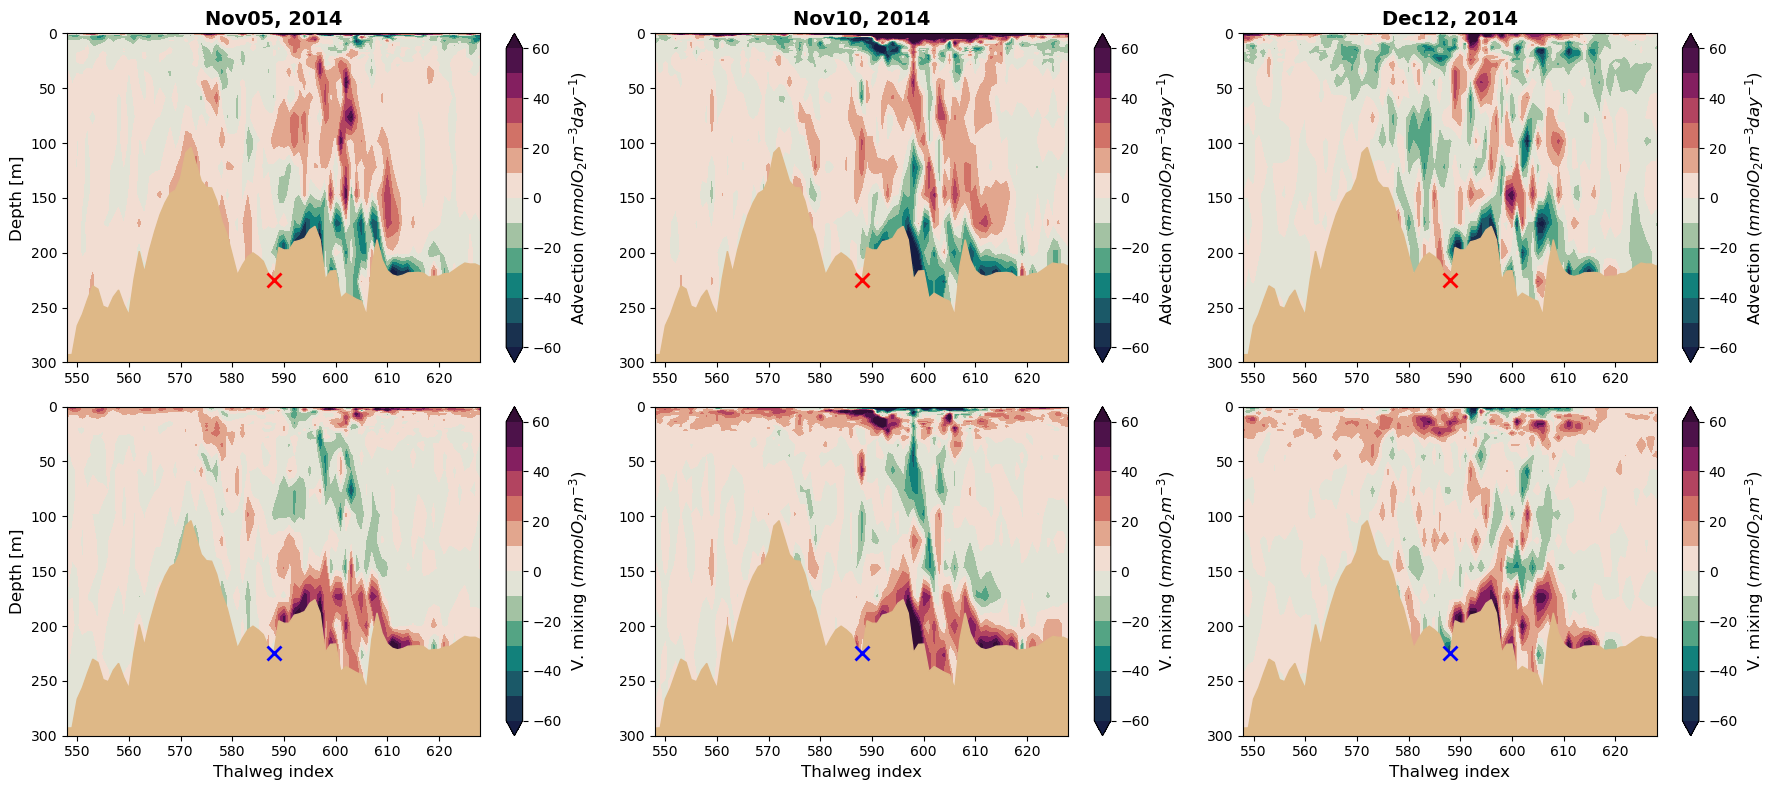

In [20]:
# Define the days
days = [
    {'mdir': '05nov14', 'ymd': '20141105', 'label': 'Nov05'},
    {'mdir': '10nov14', 'ymd': '20141110', 'label': 'Nov10'}, 
    {'mdir': '12dec14', 'ymd': '20141212', 'label': 'Dec12'}
]

daily_base_dir = '/ocean/atall/MOAD/Model/202410b/oxygen/'

fig, axs = plt.subplots(2, 3, figsize=(18, 8))

for col, day_info in enumerate(days):
    mdir = day_info['mdir']
    ymd = day_info['ymd']
    label = day_info['label']
    
    print(f"Processing {label}...")
    
    daily_dir = os.path.join(daily_base_dir, mdir)
    diag_file = f"SalishSea_1d_{ymd}_{ymd}_diag_T.nc"
    
    diag_path = os.path.join(daily_dir, diag_file)
    
    
    diag_ds = xr.open_dataset(diag_path)
    
    phs = diag_ds['PHS_O2'].squeeze()  * 86400
    ldf = diag_ds['LDF_O2'].squeeze()  * 86400
    zdf = diag_ds['ZDF_O2'].squeeze()  * 86400
    adv = phs - ldf - zdf
        
    # Mask zero values
    m = adv == 0
    adv = np.ma.array(adv, mask=m)
    zdf = np.ma.array(zdf, mask=m)
        
    # Plot salinity in row 0
    cbar_adv = visualisations.contour_thalweg(axs[0, col], adv, bathymetry, meshgrid, 
                                        clevels=[-60, -50, -40, -30, -20, -10, 0, 
                                                10, 20, 30, 40, 50, 60], 
                                        cmap=cm.curl, xcoord_distance=False)
    cbar_adv.set_label('Advection ($mmolO_2m^{-3}day^{-1}$)', fontsize=12)
        
    # Plot oxygen in row 1
    cbar_zdf = visualisations.contour_thalweg(axs[1, col], zdf, bathymetry, meshgrid, 
                                        clevels=[-60, -50, -40, -30, -20, -10, 0, 
                                                10, 20, 30, 40, 50, 60], 
                                        cmap=cm.curl, xcoord_distance=False)
    cbar_zdf.set_label('V. mixing ($mmolO_2m^{-3}$)', fontsize=12)
        
    # Set limits and markers
    for row in [0, 1]:
        axs[row, col].set_ylim(300, 0)
        axs[row, col].set_xlim(548, 628)
        #axs[row, col].set_xlim(400, 780)
        # Mark BP location
        axs[row, col].plot(588, 225, 'xr' if row == 0 else 'xb', markersize=10, markeredgewidth=2)
        if row == 0:
            axs[row, col].set_xlabel('')
        else:
            axs[row, col].set_xlabel('Thalweg index', fontsize=12)
        
    axs[0, col].set_title(f'{label}, 2014', fontsize=14, fontweight='bold')
    
    # Set row labels on first column only
    if col == 0:
        axs[0, col].set_ylabel('Depth [m]', fontsize=12)
        axs[1, col].set_ylabel('Depth [m]', fontsize=12)
    else:
        axs[0, col].set_ylabel('')
        axs[1, col].set_ylabel('')



plt.tight_layout()

outdir = 'diagnostics_output'
os.makedirs(outdir, exist_ok=True)
plt.savefig(f'{outdir}/thalweg_daily_comparison_nov05_nov10_dec12_ADV_VMIX.png', bbox_inches='tight', dpi=150)
plt.show()

Processing days with Susan's method...
bottom_zdf (202410b) = -12.79403013177216
bottom_zdf (202410b) = 2.91923739714548
bottom_zdf (202410b) = -49.24750495702028
Creating combined profiles plot for three days...
Saved diagnostics_output/combined_profiles_nov05_nov10_dec12.png
Creating combined time series plots with mean values for three days...
Saved diagnostics_output/timeseries_with_means_nov05_nov10_dec12.png
Creating summary table...
Saved summary table to diagnostics_output/summary_table_nov05_nov10_dec12.csv

SUMMARY RESULTS

Short summary table:
       mean_nearbot_grad  mean_F_above_bot  mean_divergence_perday
label                                                             
Nov05           0.010195         38.175855               -1.884693
Nov10           0.061429       -154.125917                7.608998
Dec12          -0.056064        529.715115              -26.151353


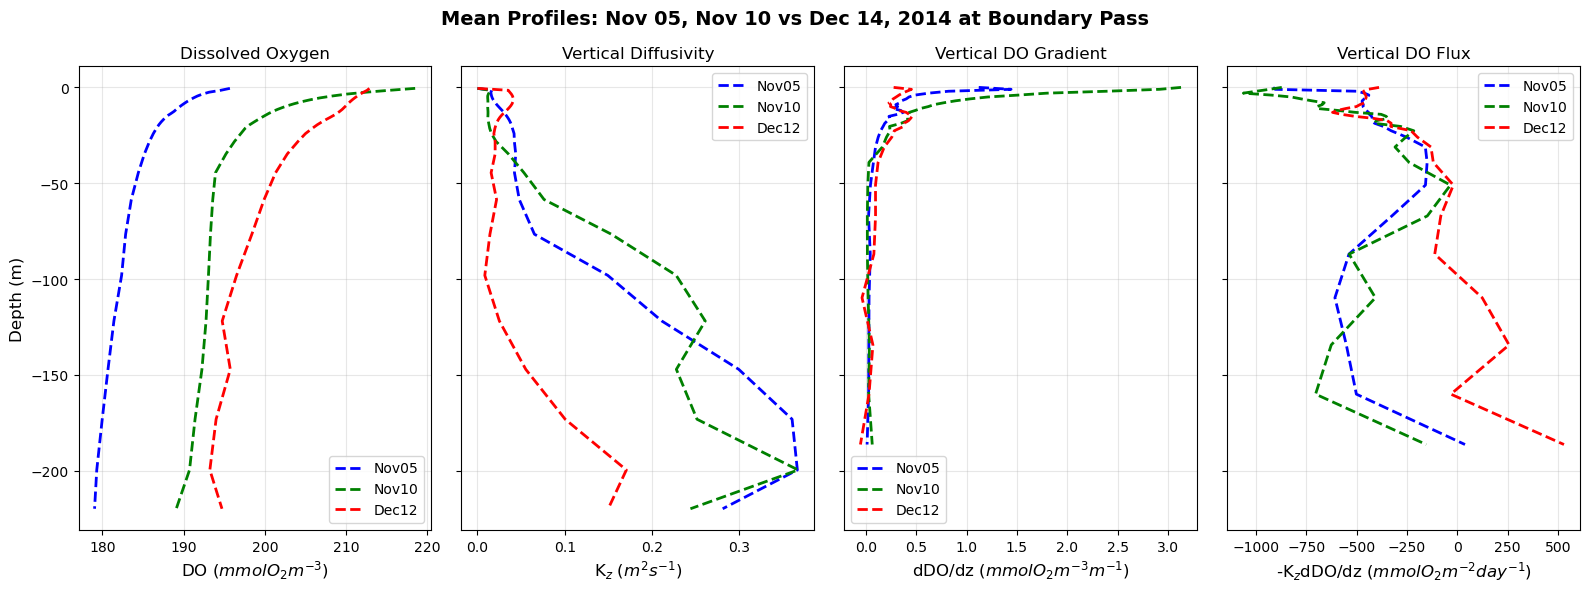

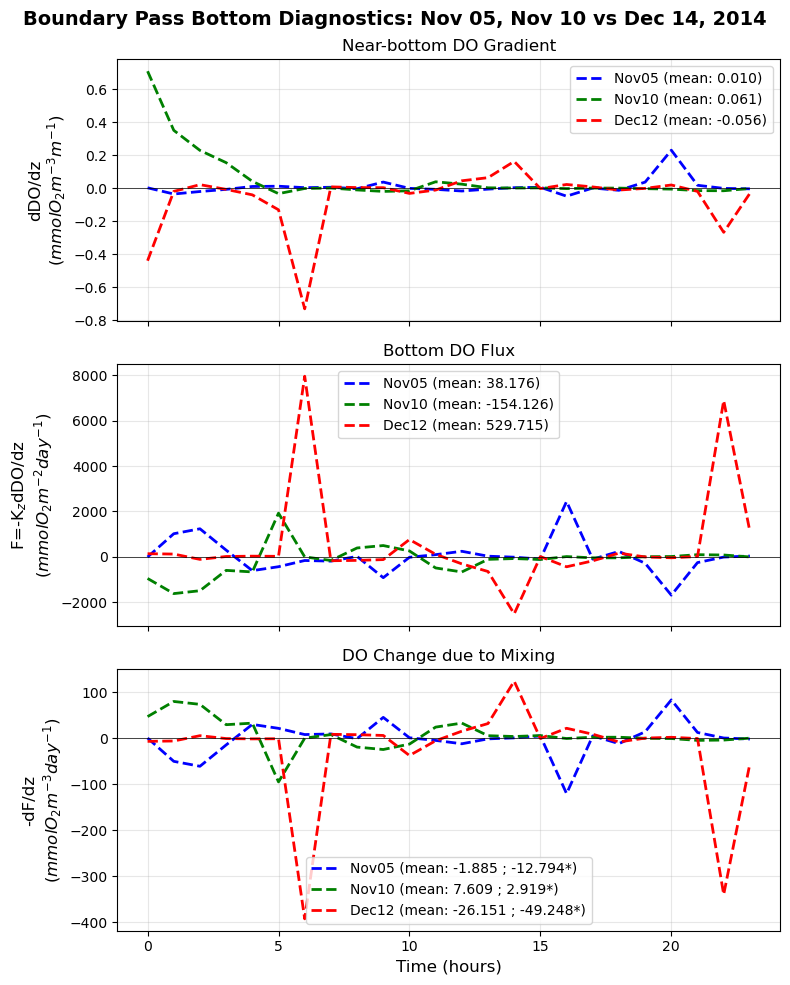

In [23]:
"""
Checklist script for diagnostics at Boundary Pass (BP)
- computes near-bottom dDO/dz, flux F = -K dDO/dz, divergence -dF/dz
- produces profiles for Nov 05, Nov 10 and Dec 14
- outputs a short table of means
"""

mdir_1 = '05nov14'  
ymd_1 = '20141105'  
mdir_2 = '10nov14'   
ymd_2 = '20141110'  
mdir_3 = '12dec14'  #or Dec14
ymd_3 = '20141212'  

# BP indices 
iibp, jjbp = 343, 289

# Vertical levels
nz_use = 32

# output folder
outdir = 'diagnostics_output'
os.makedirs(outdir, exist_ok=True)

# Load datasets

# Define file paths
base_dir = '/results2/SalishSea/nowcast-green.202111'
diag_dir = '/ocean/atall/MOAD/Model/202410b/oxygen/'
chem_subdir = lambda mdir, ymd: f'{base_dir}/{mdir}/SalishSea_1h_{ymd}_{ymd}_chem_T.nc'
grid_subdir = lambda mdir, ymd: f'{base_dir}/{mdir}/SalishSea_1h_{ymd}_{ymd}_grid_W.nc'
diag_grid_subdir = lambda mdir, ymd: f'{diag_dir}/{mdir}/SalishSea_1d_{ymd}_{ymd}_diag_T.nc'

# Nov05
oxy1 = xr.open_dataset(chem_subdir(mdir_1, ymd_1))
mix1 = xr.open_dataset(grid_subdir(mdir_1, ymd_1))
zdf1 = xr.open_dataset(diag_grid_subdir(mdir_1, ymd_1))

# Nov10 
oxy2 = xr.open_dataset(chem_subdir(mdir_2, ymd_2))
mix2 = xr.open_dataset(grid_subdir(mdir_2, ymd_2))
zdf2 = xr.open_dataset(diag_grid_subdir(mdir_2, ymd_2))

# Dec14 or Dec12
oxy3 = xr.open_dataset(chem_subdir(mdir_3, ymd_3))
mix3 = xr.open_dataset(grid_subdir(mdir_3, ymd_3))
zdf3 = xr.open_dataset(diag_grid_subdir(mdir_3, ymd_3))

# Load mesh
mesh_path = '/home/sallen/MEOPAR/grid/mesh_mask202108.nc'
mesh = xr.open_dataset(mesh_path)

# Get mesh variables at BP location
e3t_bp = mesh['e3t_0'].isel(y=iibp, x=jjbp).squeeze().values
e3w_bp = mesh['e3w_0'].isel(y=iibp, x=jjbp).squeeze().values
gdept_bp = mesh['gdept_0'].isel(y=iibp, x=jjbp).squeeze().values
gdepw_bp = mesh['gdepw_0'].isel(y=iibp, x=jjbp).squeeze().values

# variable names
DOvar = 'dissolved_oxygen'
Kvar = 'vert_eddy_diff'  
zdfvar = 'ZDF_O2'


def process_day_exact_method(oxy_ds, mix_ds, diag_ds, label):
    """
    Compute diagnostics using method from Susan's code
    """
    
    # Extract data 
    DO_data = oxy_ds[DOvar][:, :nz_use, iibp, jjbp]
    K_data = mix_ds[Kvar][:, :nz_use, iibp, jjbp]
    zdf_data = diag_ds[zdfvar][:, :nz_use, iibp, jjbp] * 86400
    
    # Convert to numpy arrays
    DO_np = DO_data.values if hasattr(DO_data, 'values') else np.array(DO_data)
    K_np = K_data.values if hasattr(K_data, 'values') else np.array(K_data)
    zdf_np = zdf_data.values if hasattr(zdf_data, 'values') else np.array(zdf_data)
    
    
    e3t_used = e3t_bp[:nz_use]  # first nz_use levels
    e3w_used = e3w_bp[:nz_use]
    gdept_used = gdept_bp[:nz_use+1]  # +1 for interfaces
    gdepw_used = gdepw_bp[:nz_use+1]
    
    
    tsteps = DO_np.shape[0]
    
    # oxy_flux
    oxy_flux = np.zeros((tsteps, nz_use))
    oxy_flux[:, 0] = 0  # no turbulent flux through the surface
    
    for t in range(tsteps):
        for k in range(1, nz_use):
            do_diff = float(DO_np[t, k-1]) - float(DO_np[t, k])
            dDO_dz = do_diff / float(e3t_used[k-1])
            k_val = float(K_np[t, k])
            oxy_flux[t, k] = -k_val * dDO_dz * 86400
    
    # oxy_mix_impact
    oxy_mix_impact = np.zeros((tsteps, nz_use))
    
    for t in range(tsteps):
        # top
        oxy_mix_impact[t, 0] = -oxy_flux[t, 0] / float(e3w_used[0])
        
        # interior
        for k in range(0, nz_use-1):
            flux_diff = -oxy_flux[t, k+1] + oxy_flux[t, k]
            oxy_mix_impact[t, k] = flux_diff / float(e3w_used[k])
        
        # bottom
        oxy_mix_impact[t, nz_use-1] = -oxy_flux[t, nz_use-1] / float(e3w_used[nz_use-1])
    
    # Convert to per day units (already done in flux calculation)
    oxy_mix_impact_perday = oxy_mix_impact #* 86400
    
    # DO gradient calculation
    dDO_dz = np.zeros((tsteps, nz_use-1))
    for t in range(tsteps):
        for k in range(nz_use-1):
            do_diff = float(DO_np[t, k]) - float(DO_np[t, k+1])
            dDO_dz[t, k] = do_diff / float(e3t_used[k])
    
    
    bottom_flux_time = oxy_flux[:, -1]  # flux upward out of bottom grid cell
    bottom_div_time = oxy_mix_impact_perday[:, -1]  # change in oxygen in bottom grid cell
    bottom_grad_time = dDO_dz[:, -1]  # gradient just above bottom

    
    mean_grad = np.nanmean(bottom_grad_time)
    mean_flux = np.nanmean(bottom_flux_time)
    mean_div = np.nanmean(bottom_div_time)
    bottom_zdf = np.nanmean(zdf_np[:, -1])  # Vertical mixing (from daily - 202410b)
    print(f"bottom_zdf (202410b) = {bottom_zdf}")

    summary = {
        'DO_np': DO_np,
        'K_np': K_np,
        'dDO_dz': dDO_dz,
        'F': oxy_flux[:, 1:],  # flux at interior interfaces
        'oxy_flux': oxy_flux,
        'oxy_mix_impact_perday': oxy_mix_impact_perday,
        'bottom_flux_time': bottom_flux_time,
        'bottom_div_time': bottom_div_time,
        'bottom_grad_time': bottom_grad_time,
        'e3t_arr': e3t_used,
        'e3w_arr': e3w_used,
        'gdept_arr': gdept_used,
        'gdepw_arr': gdepw_used,
        'DO_da': DO_data,
        'K_da': K_data,
        #'zdf_da': zdf_data,
        'label': label,
        'mean_grad': mean_grad,
        'mean_flux': mean_flux,
        'mean_div': mean_div,
        'bottom_zdf': bottom_zdf
    }
    
    mean_bottom_impact = oxy_mix_impact_perday[:, -1].mean(axis=0)
    
    return summary

# Process all three days
print("Processing days with Susan's method...")
s1 = process_day_exact_method(oxy1, mix1, zdf1, 'Nov05')
s2 = process_day_exact_method(oxy2, mix2, zdf2, 'Nov10')
s3 = process_day_exact_method(oxy3, mix3, zdf3, 'Dec12')

# Profiles Plot for Three Representative Days
def plot_combined_profiles(s1, s2, s3):
    """Plot combined profiles for Nov05, Nov10 and Dec12 in one figure"""
    print("Creating combined profiles plot for three days...")
    
    # Calculate means
    mean_DO1 = s1['DO_np'].mean(axis=0)
    mean_K1 = s1['K_np'].mean(axis=0)
    mean_dDOdz1 = s1['dDO_dz'].mean(axis=0)
    mean_F1 = s1['F'].mean(axis=0)

    mean_DO2 = s2['DO_np'].mean(axis=0)
    mean_K2 = s2['K_np'].mean(axis=0)
    mean_dDOdz2 = s2['dDO_dz'].mean(axis=0)
    mean_F2 = s2['F'].mean(axis=0)

    mean_DO3 = s3['DO_np'].mean(axis=0)
    mean_K3 = s3['K_np'].mean(axis=0)
    mean_dDOdz3 = s3['dDO_dz'].mean(axis=0)
    mean_F3 = s3['F'].mean(axis=0)

    # Use depths from first day 
    z_centers = -s1['gdept_arr'][:len(mean_DO1)]
    z_interfaces = -s1['gdepw_arr'][:len(mean_dDOdz1)]

    fig, axs = plt.subplots(1, 4, figsize=(16, 6), sharey=True)
    
    # Panel 1: DO
    axs[0].plot(mean_DO1, z_centers, 'b--', label='Nov05', linewidth=2)
    axs[0].plot(mean_DO2, z_centers, 'g--', label='Nov10', linewidth=2)
    axs[0].plot(mean_DO3, z_centers, 'r--', label='Dec12', linewidth=2)
    axs[0].set_title('Dissolved Oxygen', fontsize=12)
    axs[0].set_xlabel('DO ($mmolO_2m^{-3}$)', fontsize=12)
    axs[0].set_ylabel('Depth (m)', fontsize=12)
    axs[0].legend()
    axs[0].grid(True, alpha=0.3)
    
    # Panel 2: Kz
    axs[1].plot(mean_K1, z_centers, 'b--', label='Nov05', linewidth=2)
    axs[1].plot(mean_K2, z_centers, 'g--', label='Nov10', linewidth=2)
    axs[1].plot(mean_K3, z_centers, 'r--', label='Dec12', linewidth=2)
    axs[1].set_title('Vertical Diffusivity', fontsize=12)
    axs[1].set_xlabel('K$_z$ ($m^{2}s^{-1}$)', fontsize=12)
    axs[1].legend()
    axs[1].grid(True, alpha=0.3)
    
    # Panel 3: dDO/dz
    axs[2].plot(mean_dDOdz1, z_interfaces, 'b--', label='Nov05', linewidth=2)
    axs[2].plot(mean_dDOdz2, z_interfaces, 'g--', label='Nov10', linewidth=2)
    axs[2].plot(mean_dDOdz3, z_interfaces, 'r--', label='Dec12', linewidth=2)
    axs[2].set_title('Vertical DO Gradient', fontsize=12)
    axs[2].set_xlabel('dDO/dz ($mmolO_2m^{-3}m^{-1}$)', fontsize=12)
    axs[2].legend()
    axs[2].grid(True, alpha=0.3)
    
    # Panel 4: F (flux)
    axs[3].plot(mean_F1, z_interfaces, 'b--', label='Nov05', linewidth=2)
    axs[3].plot(mean_F2, z_interfaces, 'g--', label='Nov10', linewidth=2)
    axs[3].plot(mean_F3, z_interfaces, 'r--', label='Dec12', linewidth=2)
    axs[3].set_title('Vertical DO Flux', fontsize=12)
    axs[3].set_xlabel('-K$_z$dDO/dz ($mmolO_2m^{-2}day^{-1}$)', fontsize=12)
    axs[3].legend()
    axs[3].grid(True, alpha=0.3)
    
    fig.suptitle('Mean Profiles: Nov 05, Nov 10 vs Dec 14, 2014 at Boundary Pass', fontsize=14, fontweight='bold')
    plt.tight_layout()
    
    figfn = os.path.join(outdir, 'combined_profiles_nov05_nov10_dec12.png')
    fig.savefig(figfn, dpi=150, bbox_inches='tight')
    print(f"Saved {figfn}")
    
    return fig

combined_fig = plot_combined_profiles(s1, s2, s3)

# Time Series Plots for Three Representative Days
def plot_combined_timeseries_with_means(s1, s2, s3):
    """Plot combined time series for Nov05, Nov10 and Dec12 in one figure with mean values"""
    print("Creating combined time series plots with mean values for three days...")
    
    times1 = s1['DO_da']['time_counter'].values
    times2 = s2['DO_da']['time_counter'].values
    times3 = s3['DO_da']['time_counter'].values
    
    # Normalized time (0-23 hours) for all days
    norm_times1 = np.arange(len(times1))
    norm_times2 = np.arange(len(times2))
    norm_times3 = np.arange(len(times3))
    
    fig, axs = plt.subplots(3, 1, figsize=(8, 10), sharex=True)
    
    # Panel 1: DO Gradient
    line1, = axs[0].plot(norm_times1, s1['bottom_grad_time'], 'b--', label=f"Nov05 (mean: {s1['mean_grad']:.3f})", linewidth=2)
    line2, = axs[0].plot(norm_times2, s2['bottom_grad_time'], 'g--', label=f"Nov10 (mean: {s2['mean_grad']:.3f})", linewidth=2)
    line3, = axs[0].plot(norm_times3, s3['bottom_grad_time'], 'r--', label=f"Dec12 (mean: {s3['mean_grad']:.3f})", linewidth=2)
    
    axs[0].axhline(0, color='k', linewidth=0.5)
    axs[0].set_ylabel('dDO/dz\n($mmolO_2m^{-3}m^{-1}$)', fontsize=12)
    axs[0].legend(loc='best')
    axs[0].grid(True, alpha=0.3)
    axs[0].set_title('Near-bottom DO Gradient', fontsize=12)
    
    # Panel 2: Flux
    line1, = axs[1].plot(norm_times1, s1['bottom_flux_time'], 'b--', label=f"Nov05 (mean: {s1['mean_flux']:.3f})", linewidth=2)
    line2, = axs[1].plot(norm_times2, s2['bottom_flux_time'], 'g--', label=f"Nov10 (mean: {s2['mean_flux']:.3f})", linewidth=2)
    line3, = axs[1].plot(norm_times3, s3['bottom_flux_time'], 'r--', label=f"Dec12 (mean: {s3['mean_flux']:.3f})", linewidth=2)
    
    axs[1].axhline(0, color='k', linewidth=0.5)
    axs[1].set_ylabel('F=-K$_z$dDO/dz\n($mmolO_2m^{-2}day^{-1}$)', fontsize=12)
    axs[1].legend(loc='best')
    axs[1].grid(True, alpha=0.3)
    axs[1].set_title('Bottom DO Flux', fontsize=12)
    
    # Panel 3: Divergence
    line1, = axs[2].plot(norm_times1, s1['bottom_div_time'], 'b--', label=f"Nov05 (mean: {s1['mean_div']:.3f} ; {s1['bottom_zdf']:.3f}*)", linewidth=2)
    line2, = axs[2].plot(norm_times2, s2['bottom_div_time'], 'g--', label=f"Nov10 (mean: {s2['mean_div']:.3f} ; {s2['bottom_zdf']:.3f}*)", linewidth=2)
    line3, = axs[2].plot(norm_times3, s3['bottom_div_time'], 'r--', label=f"Dec12 (mean: {s3['mean_div']:.3f} ; {s3['bottom_zdf']:.3f}*)", linewidth=2)
    
    axs[2].axhline(0, color='k', linewidth=0.5)
    axs[2].set_ylabel('-dF/dz\n($mmolO_2m^{-3}day^{-1}$)', fontsize=12)
    axs[2].legend(loc='best')
    axs[2].grid(True, alpha=0.3)
    axs[2].set_title('DO Change due to Mixing', fontsize=12)
    axs[2].set_xlabel('Time (hours)', fontsize=12)
    
    fig.suptitle('Boundary Pass Bottom Diagnostics: Nov 05, Nov 10 vs Dec 14, 2014', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    
    figfn = os.path.join(outdir, 'timeseries_with_means_nov05_nov10_dec12.png')
    fig.savefig(figfn, dpi=150, bbox_inches='tight')
    print(f"Saved {figfn}")
    
    return fig

combined_ts_fig = plot_combined_timeseries_with_means(s1, s2, s3)

# Summary Table for Three Representative Days
def summary_table(s, label):
    """Create summary table"""
    mean_nearbed_grad = np.nanmean(s['bottom_grad_time'])
    mean_F_above_bed = np.nanmean(s['bottom_flux_time'])
    mean_divergence = np.nanmean(s['bottom_div_time'])
    return {
        'label': label,
        'mean_nearbot_grad': mean_nearbed_grad,
        'mean_F_above_bot': mean_F_above_bed, 
        'mean_divergence_perday': mean_divergence
    }

print("Creating summary table...")
row1 = summary_table(s1, 'Nov05')
row2 = summary_table(s2, 'Nov10')
row3 = summary_table(s3, 'Dec12')
df = pd.DataFrame([row1, row2, row3]).set_index('label')
outcsv = os.path.join(outdir, 'summary_table_nov05_nov10_dec12.csv')
df.to_csv(outcsv)
print(f"Saved summary table to {outcsv}")

# Print summary
print("\n" + "="*60)
print("SUMMARY RESULTS")
print("="*60)
print("\nShort summary table:")
print(df.to_string(float_format='{:0.6f}'.format))
